In [49]:
import geopandas as gpd
import numpy as np
import rasterio
from shapely import LineString, Polygon, Point
import shapely
from shapely import ops
import matplotlib.pyplot as plt
from CPP_Planner import CPP_Algorithms, CPP_Planner_Kit, CPP_Algorithm_Optimizers
from shapely import affinity
from skimage.measure import approximate_polygon
import warnings
import math

In [4]:
all_land = gpd.read_file('test_Load_Shp/shp_file/村地和道路/村地地块区域.shp')
single_real_path = gpd.read_file('test_Load_Shp/test_shps/swath_group_1.shp')
single_gen_path_1 = gpd.read_file('test_Load_Shp/test_shps/shp_land_1.shp')
single_gen_path_2 = gpd.read_file('test_Load_Shp/test_shps/shp_land_2.shp')
straight_path = gpd.read_file('../pathline_real_modeling/GIS_data/straight_swaths/straight_swaths.shp')

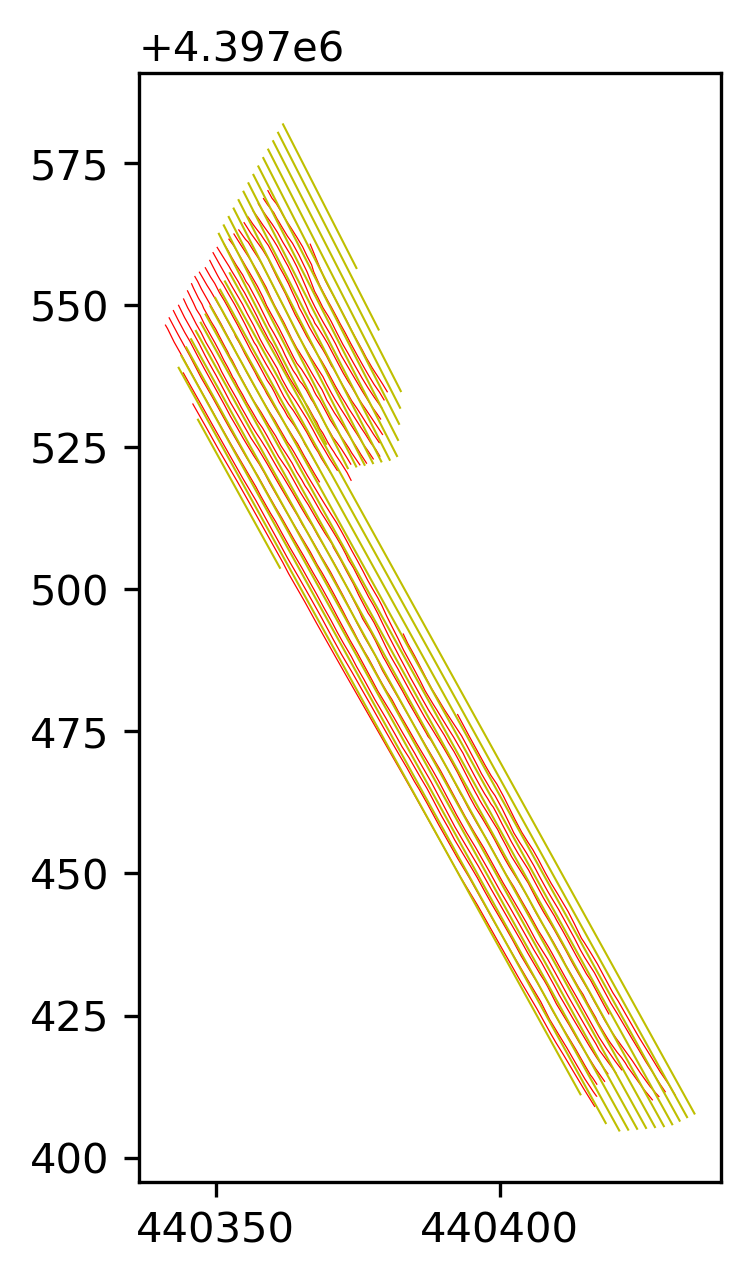

In [5]:
single_land = CPP_Planner_Kit.get_single_shp(all_land, 0)
_, ax = plt.subplots(dpi=300)
# ax.plot(*single_land.geometry[0].exterior.xy, color='b', linewidth=0.6)
single_real_path.plot(ax=ax, color='r', linewidth=0.3)
single_gen_path_1.plot(ax=ax, color='y', linewidth=0.5)
single_gen_path_2.plot(ax=ax, color='y', linewidth=0.5)
# 保存一下刚才显示出的结果，保存为图片
# plt.savefig('test_Load_Shp/test_shps/land_1.png', dpi=600)

### 显示理想的直线和实际耕作的路线

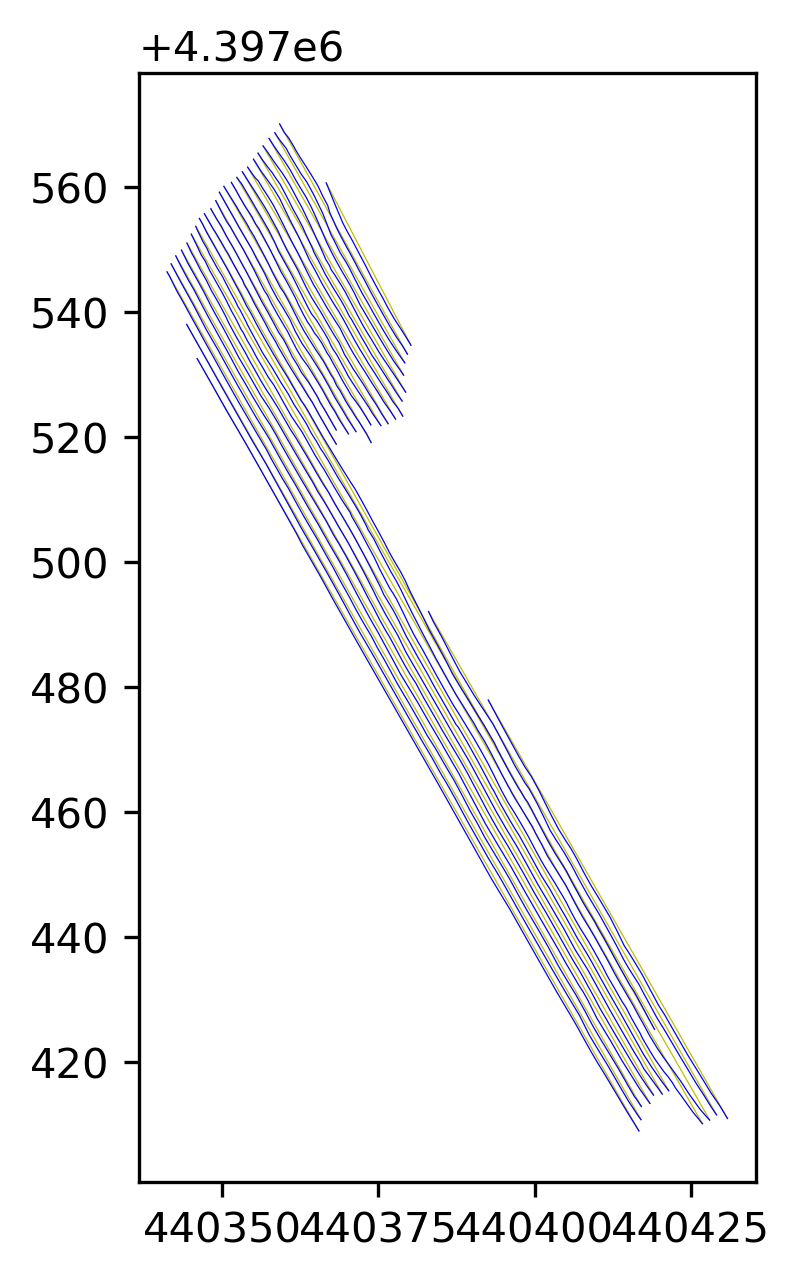

In [10]:
_, ax = plt.subplots(dpi=300)
straight_path.plot(ax=ax, color='y', linewidth=0.3)
single_real_path.plot(ax=ax, color='b', linewidth=0.3)
plt.savefig('test_Load_Shp/test_shps/land_1_compare.png', dpi=600)

## 检查当前两种路径

In [11]:
single_real_path

,NAME,LAYER,长度,方位,曲折度,geometry
0,1,Unclassified Line Feature,142.66 m,"149° 47' 08.416""",1.000084,"LINESTRING (440345.934 4397532.698, 440348.334..."
1,2,Unclassified Line Feature,146.86 m,"149° 49' 01.146""",1.000202,"LINESTRING (440344.259 4397538.164, 440345.501..."
2,3,Unclassified Line Feature,153.94 m,"329° 56' 45.028""",1.000279,"LINESTRING (440417.124 4397412.820, 440416.300..."
3,4,Unclassified Line Feature,154.98 m,"149° 51' 25.607""",1.000331,"LINESTRING (440341.767 4397547.859, 440343.399..."
4,5,Unclassified Line Feature,154.86 m,"329° 54' 08.492""",1.000380,"LINESTRING (440419.076 4397414.652, 440417.959..."
5,6,Unclassified Line Feature,155.79 m,"149° 52' 58.264""",1.000548,"LINESTRING (440343.423 4397550.060, 440344.526..."
6,7,Unclassified Line Feature,156.4 m,"149° 56' 25.241""",1.000730,"LINESTRING (440344.310 4397551.179, 440345.077..."
7,8,Unclassified Line Feature,164.67 m,"329° 40' 16.705""",1.001332,"LINESTRING (440426.906 4397410.078, 440426.097..."
8,9,Unclassified Line Feature,165.47 m,"149° 39' 11.340""",1.001340,"LINESTRING (440345.716 4397553.864, 440346.106..."
9,10,Unclassified Line Feature,149.15 m,"330° 14' 55.829""",1.000627,"LINESTRING (440419.227 4397425.188, 440418.272..."


In [12]:
straight_path

,NAME,LAYER,长度,方位,曲折度,geometry
0,1,Unclassified Line Feature,142.65 m,"149° 47' 08.416""",1,"LINESTRING (440345.934 4397532.698, 440416.734..."
1,2,Unclassified Line Feature,146.82 m,"149° 48' 51.419""",1,"LINESTRING (440344.259 4397538.164, 440417.068..."
2,3,Unclassified Line Feature,153.9 m,"149° 56' 42.960""",1,"LINESTRING (440341.111 4397546.573, 440417.124..."
3,4,Unclassified Line Feature,154.93 m,"149° 51' 25.607""",1,"LINESTRING (440341.767 4397547.859, 440418.496..."
4,5,Unclassified Line Feature,154.8 m,"149° 54' 06.408""",1,"LINESTRING (440342.514 4397549.133, 440419.076..."
5,6,Unclassified Line Feature,155.7 m,"149° 52' 58.264""",1,"LINESTRING (440343.423 4397550.060, 440420.474..."
6,7,Unclassified Line Feature,156.29 m,"149° 56' 25.241""",1,"LINESTRING (440344.310 4397551.179, 440421.514..."
7,8,Unclassified Line Feature,164.45 m,"149° 40' 14.477""",1,"LINESTRING (440345.000 4397552.608, 440426.906..."
8,9,Unclassified Line Feature,165.25 m,"149° 39' 11.340""",1,"LINESTRING (440345.716 4397553.864, 440428.067..."
9,10,Unclassified Line Feature,149.06 m,"150° 14' 53.844""",1,"LINESTRING (440346.290 4397555.123, 440419.227..."


### 测试在曲折的 real swath 上按照固定值 取值

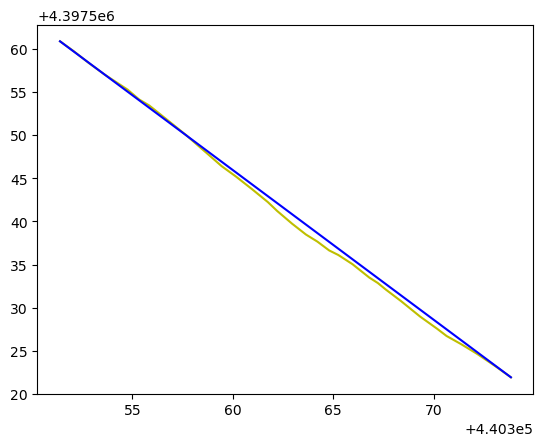

In [16]:
sample_index = 15
one_real_swath = single_real_path.geometry.iloc[sample_index]
one_straight_swath = straight_path.geometry.iloc[sample_index]
_, ax = plt.subplots()
ax.plot(*one_real_swath.xy, color='y')
ax.plot(*one_straight_swath.xy, color='b')

In [33]:
step_length = 1  # 设置取值的长度间隔为 1 m
sample_points = np.arange(0, one_real_swath.length, step_length)
interpolated_points = [one_real_swath.interpolate(sample_point) for sample_point in sample_points]
interpolated_points[:6]

[<POINT (440373.832 4397521.925)>,
 <POINT (440373.316 4397522.782)>,
 <POINT (440372.791 4397523.633)>,
 <POINT (440372.255 4397524.478)>,
 <POINT (440371.687 4397525.3)>,
 <POINT (440371.097 4397526.107)>]

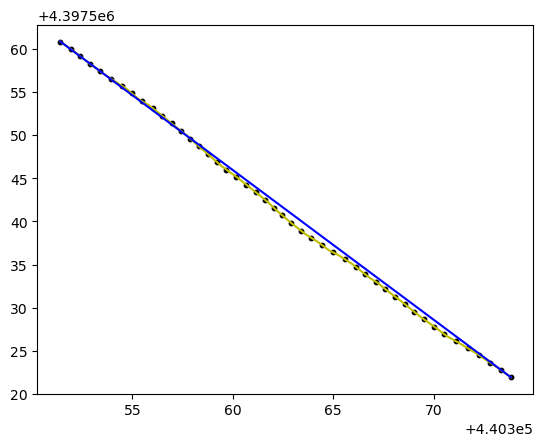

In [30]:
# 检查
_, ax = plt.subplots()
ax.plot(*one_real_swath.xy, color='y')
ax.plot(*one_straight_swath.xy, color='b')
for point in interpolated_points:
    ax.scatter(*point.xy, color='black', s=10)

### 计算某一点，到一条曲线或直线的最近距离

<class 'shapely.geometry.point.Point'> 1.1529313580901142 1.5619323266815515


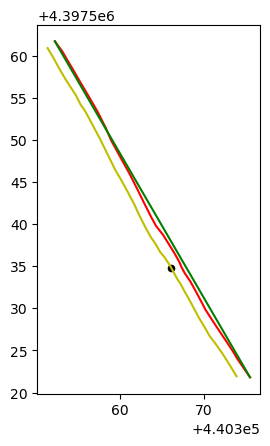

In [45]:
# 首先取当前 swath 的临近一条线
distance_line = single_real_path.geometry.iloc[sample_index + 1]
# 取 当前插值得到的线上 任意一点
one_point = interpolated_points[sample_index]
print(type(one_point), one_point.distance(distance_line), one_point.distance(straight_path.geometry.iloc[sample_index + 1]))
_, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(*one_real_swath.xy, color='y')
ax.plot(*distance_line.xy, color='r')
ax.plot(*straight_path.geometry.iloc[sample_index+1].xy, color='g')
ax.scatter(*one_point.xy, color='black', s=20)


In [65]:
# 读取 dem 数据，通过 geopandas 或者 rasterio
raster_dem = rasterio.open('../pathline_real_modeling/GIS_data/路径规划优化用数据/2m_pClouds_regen_dem_cm.tif')
dem_data = raster_dem.read(1)
type(raster_dem)

rasterio.io.DatasetReader

In [66]:
line_height = []
for point in interpolated_points:
    row, col = raster_dem.index(point.x, point.y)
    line_height.append(dem_data[row, col])
line_height

[20351,
 20328,
 20328,
 20373,
 20404,
 20404,
 20416,
 20416,
 20429,
 20429,
 20408,
 20408,
 20455,
 20430,
 20430,
 20428,
 20447,
 20432,
 20432,
 20438,
 20427,
 20427,
 20396,
 20396,
 20431,
 20431,
 20431,
 20420,
 20460,
 20445,
 20445,
 20436,
 20456,
 20484,
 20484,
 20484,
 20457,
 20499,
 20492,
 20492,
 20506,
 20506,
 20506,
 20472,
 20509,
 20474]